# **Smart City Traffic Patterns Forecasting**
The proposed design incorporates a diverse ensemble of machine learning algorithms, each selected for its unique capabilities in addressing the complexities of traffic pattern forecasting. The ensemble includes well-established algorithms such as XGBoost, Linear Regression, Support Vector Regression (SVR), Gradient Boosting, LightGBM, Neural Network Regressor, Decision Tree, and Random Forest.



**Github Repository link** - https://github.com/ShelinVankawala/upskillCampus.git

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
%matplotlib inline

# **Data Preprocessing**

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/SmartCityProject/train.csv',parse_dates=[0],infer_datetime_format=True)
test = pd.read_csv('/content/drive/MyDrive/SmartCityProject/test.csv',parse_dates=[0],infer_datetime_format=True)

In [ ]:
train.dropna(inplace=True)
train.info()
train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.5 MB


,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [ ]:
test.dropna(inplace=True)
test.info()
test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  11808 non-null  datetime64[ns]
 1   Junction  11808 non-null  int64         
 2   ID        11808 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 276.9 KB


,DateTime,Junction,ID
0,2017-07-01 00:00:00,1,20170701001
1,2017-07-01 01:00:00,1,20170701011
2,2017-07-01 02:00:00,1,20170701021
3,2017-07-01 03:00:00,1,20170701031
4,2017-07-01 04:00:00,1,20170701041
...,...,...,...
11803,2017-10-31 19:00:00,4,20171031194
11804,2017-10-31 20:00:00,4,20171031204
11805,2017-10-31 21:00:00,4,20171031214
11806,2017-10-31 22:00:00,4,20171031224


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import time
import seaborn as sns

from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *
import lightgbm as lgb
import xgboost as xgb

# Boosting Algorithm Libraries :
from sklearn.ensemble import RandomForestRegressor

In [ ]:
display(train.describe())

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [ ]:
print('Before dropping ',train.shape[0])
train.drop_duplicates(keep="first", inplace=True)
print('After dropping ',train.shape[0])

Before dropping  48120
After dropping  48120


In [ ]:
if(train.isnull().sum().sum()==0):
    print('No missing values in train')
else:
    train.fillna(method='ffill',inplace=True)
if(test.isnull().sum().sum()==0):
    print('No missing values in test')
else:
    test.fillna(method='ffill',inplace=True)

No missing values in train
No missing values in test


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.8 MB


In [ ]:
train["Year"]= train['DateTime'].dt.year
train["Month"]= train['DateTime'].dt.month
train["Date_no"]= train['DateTime'].dt.day
train["Hour"]= train['DateTime'].dt.hour
train["Day"]= train.DateTime.dt.strftime("%A")

test["Year"]= test['DateTime'].dt.year
test["Month"]= test['DateTime'].dt.month
test["Date_no"]= test['DateTime'].dt.day
test["Hour"]= test['DateTime'].dt.hour
test["Day"]= test.DateTime.dt.strftime("%A")

In [ ]:
train.head()

,DateTime,Junction,Vehicles,ID,Year,Month,Date_no,Hour,Day
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,1,0,Sunday
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,1,1,Sunday
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,1,2,Sunday
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,1,3,Sunday
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,1,4,Sunday


In [ ]:
test.head()

,DateTime,Junction,ID,Year,Month,Date_no,Hour,Day
0,2017-07-01 00:00:00,1,20170701001,2017,7,1,0,Saturday
1,2017-07-01 01:00:00,1,20170701011,2017,7,1,1,Saturday
2,2017-07-01 02:00:00,1,20170701021,2017,7,1,2,Saturday
3,2017-07-01 03:00:00,1,20170701031,2017,7,1,3,Saturday
4,2017-07-01 04:00:00,1,20170701041,2017,7,1,4,Saturday


# **Data Visualization**

Text(0.5, 0, 'DateTime')

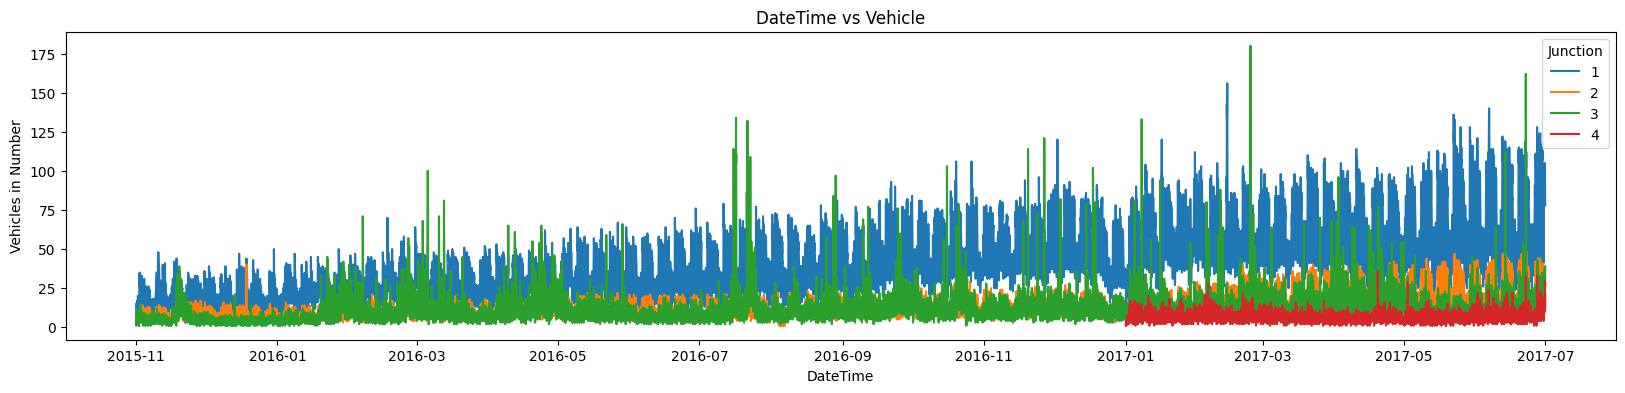

In [ ]:
# time series plot
colors = ['#1f77b4','#ff7f0e','#2ca02c','#d62728']
plt.figure(figsize=(20,4))
time_series=sns.lineplot(x=train['DateTime'],y="Vehicles",data=train, hue="Junction", palette=colors)
time_series.set_title("DateTime vs Vehicle")
time_series.set_ylabel("Vehicles in Number")
time_series.set_xlabel("DateTime")

Text(0.5, 0, 'Date')

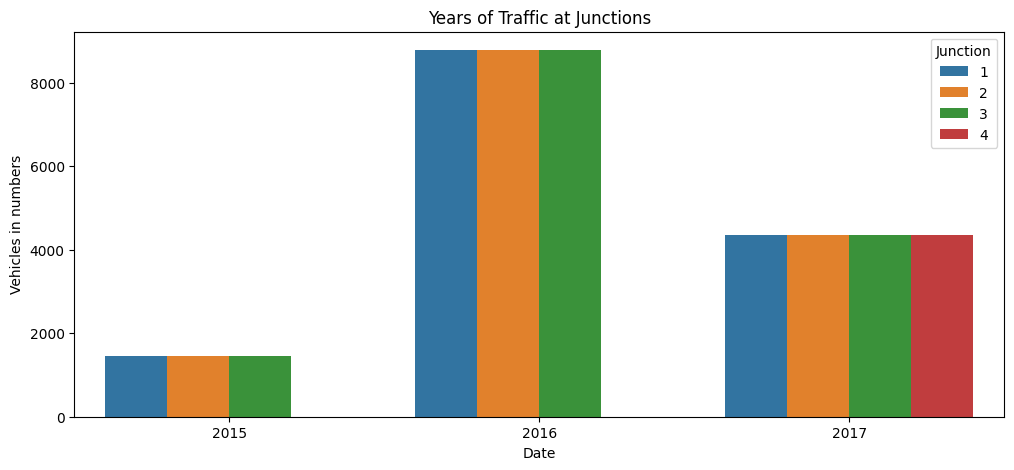

In [ ]:
#years of traffic at junction
plt.figure(figsize=(12,5))
colors = [ '#1f77b4','#ff7f0e','#2ca02c','#d62728']
count = sns.countplot(data=train, x =train["Year"], hue="Junction", palette=colors)
count.set_title("Years of Traffic at Junctions")
count.set_ylabel("Vehicles in numbers")
count.set_xlabel("Date")

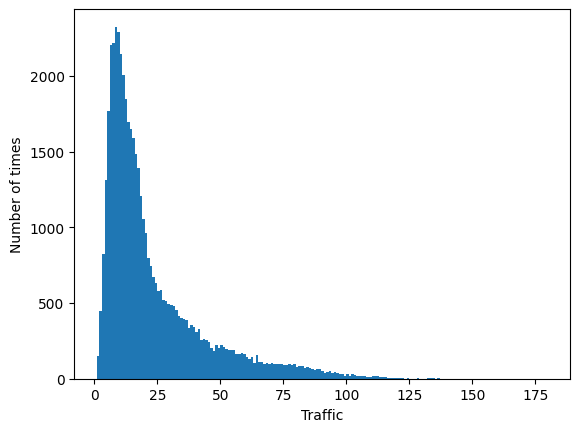

In [ ]:
data = train.Vehicles
binwidth = 1
plt.hist(data, bins=range(min(data), max(data) + binwidth, binwidth), log=False)
plt.xlabel("Traffic")
plt.ylabel("Number of times")
plt.show()

<ipython-input-37-652228b94b29>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train.corr()


<Axes: >

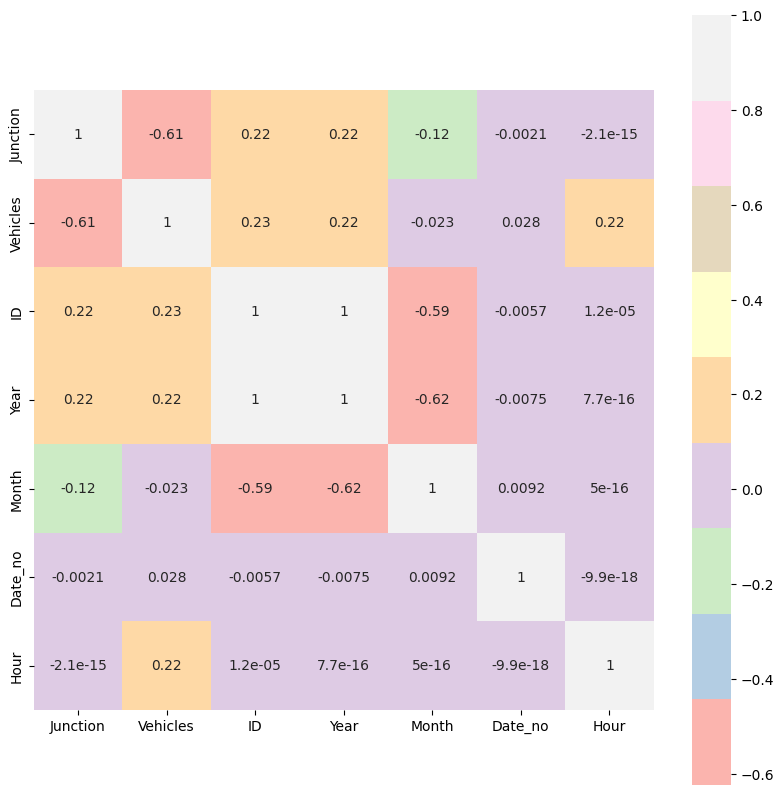

In [ ]:
#heat map
corrmat = train.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrmat,cmap= "Pastel1",annot=True,square=True, )

In [ ]:
def datetounix1(df):
    unixtime = []

    for date in df['DateTime']:
        unixtime.append(time.mktime(date.timetuple()))

    # Replacing Date with unixtime list
    df['DateTime'] = unixtime
    return(df)

In [ ]:
train.head()

,DateTime,Junction,Vehicles,ID,Year,Month,Date_no,Hour,Day
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,1,0,Sunday
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,1,1,Sunday
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,1,2,Sunday
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,1,3,Sunday
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,1,4,Sunday


# **Train-Test Split**

In [ ]:
train_features = datetounix1(train.drop(['Vehicles'], axis=1))
test_features = datetounix1(test)

X = train_features
X_valid = test_features

X = pd.get_dummies(X)
X_valid = pd.get_dummies(X_valid)

y = train['Vehicles'].to_frame()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=512)

**LightGBM**

In [ ]:
# Convert the dataset to LightGBM data format
train_data = lgb.Dataset(X_train, label=y_train)

params = {
    'objective': 'regression',
    'metric': 'rmse'
}

model = lgb.train(params,train_data, num_boost_round=100)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 602
[LightGBM] [Info] Number of data points in the train set: 32240, number of used features: 14
[LightGBM] [Info] Start training from score 22.676458
Mean Squared Error: 26.130020507003152
Mean Absolute Error: 2.9299309567160123
R2 Score: 0.9407083622016995


**Random Forest**

In [ ]:
# Create a Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

<ipython-input-22-0930f76fa060>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


Mean Squared Error: 15.803522852644837
Mean Absolute Error: 2.5130220403022667
R2 Score: 0.9641402212958443


In [ ]:
print(X_train.shape, y_train.shape)

(32240, 14) (32240, 1)


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a Decision Tree regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

dt_regressor.fit(X_train, y_train)

y_pred_dt = dt_regressor.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Regressor Metrics:")
print("Mean Squared Error:", mse_dt)
print("Mean Absolute Error:", mae_dt)
print("R2 Score:", r2_dt)


Decision Tree Regressor Metrics:
Mean Squared Error: 25.509319899244332
Mean Absolute Error: 3.1848866498740556
R2 Score: 0.9421167941471148


**Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Build the neural network model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_scaled, y_train, epochs=25, batch_size=32, validation_split=0.2)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)


Epoch 1/25
806/806 [==============================] - 4s 5ms/step - loss: 371.1408 - val_loss: 117.2337
Epoch 2/25
806/806 [==============================] - 2s 3ms/step - loss: 117.5709 - val_loss: 99.5179
Epoch 3/25
806/806 [==============================] - 3s 3ms/step - loss: 102.9502 - val_loss: 85.6900
Epoch 4/25
806/806 [==============================] - 2s 2ms/step - loss: 88.3720 - val_loss: 72.8459
Epoch 5/25
806/806 [==============================] - 2s 2ms/step - loss: 77.3211 - val_loss: 65.6927
Epoch 6/25
806/806 [==============================] - 2s 2ms/step - loss: 71.9606 - val_loss: 61.9244
Epoch 7/25
806/806 [==============================] - 2s 3ms/step - loss: 69.0180 - val_loss: 59.8775
Epoch 8/25
806/806 [==============================] - 2s 3ms/step - loss: 66.9657 - val_loss: 57.5448
Epoch 9/25
806/806 [==============================] - 2s 2ms/step - loss: 65.2115 - val_loss: 56.2615
Epoch 10/25
806/806 [==============================] - 2s 2ms/step - loss: 63.

**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a Gradient Boosting regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

gb_regressor.fit(X_train, y_train)

y_pred_gb = gb_regressor.predict(X_test)

mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regressor Metrics:")
print("Mean Squared Error:", mse_gb)
print("Mean Absolute Error:", mae_gb)
print("R2 Score:", r2_gb)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting Regressor Metrics:
Mean Squared Error: 44.51178799441004
Mean Absolute Error: 4.002632993644823
R2 Score: 0.8989982877812143


**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Create Linear Regression model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_regressor = LinearRegression()

linear_regressor.fit(X_train_scaled, y_train)

y_pred = linear_regressor.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

Mean Squared Error: 174.1228289121701
Mean Absolute Error: 9.664529288686637
R2 Score: 0.604897833834119


**XGBoost**

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Create XGBoost model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

model = xgb.train(params, dtrain, num_boost_round=100)

y_pred = model.predict(dtest)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

Mean Squared Error: 21.197996956679592
Mean Absolute Error: 2.6766113185987663
R2 Score: 0.951899618399914


**Support Vector Regressor**

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Create and train the SVR model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

svr = SVR(kernel='linear', C=1.0)
svr.fit(X_train_scaled, y_train)

y_pred = svr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R2 Score:", r2)

Mean Squared Error: 204.90360785685357
Mean Absolute Error: 9.24291303317322
R2 Score: 0.5350531585936769
